In [180]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
data_20 = pd.read_csv('data/tun20.csv')
data_21 = pd.read_csv('data/tun21.csv')
data_22 = pd.read_csv('data/tun22.csv')
data_23 = pd.read_csv('data/tun23.csv')
data_24 = pd.read_csv('data/tun24.csv')
data_25 = pd.read_csv('data/tun25.csv')
data_26 = pd.read_csv('data/tun26.csv')

In [208]:
data_20["MP"] = data_20["Wins"] + data_20["Draws"] + data_20["Losses"]
data_21["MP"] = data_21["Wins"] + data_21["Draws"] + data_21["Losses"]
data_25["MP"] = data_25["Wins"] + data_25["Draws"] + data_25["Losses"]

data_20["PtsPerGame"] = data_20["Pts"] / data_20["MP"]
data_21["PtsPerGame"] = data_21["Pts"] / data_21["MP"]
data_25["PtsPerGame"] = data_25["Pts"] / data_25["MP"]

data_20["GapToFirst"] = data_20["Pts"] - data_20["Pts"].max()
data_21["GapToFirst"] = data_21["Pts"] - data_21["Pts"].max()
data_25["GapToFirst"] = data_25["Pts"] - data_25["Pts"].max()

In [209]:
full_data = pd.concat([data_20,data_21,data_22,data_23,data_24,data_25,data_26], ignore_index=True)
full_data.describe()

,Position,Pts,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalsDifference,HomeWins,HomeDraws,...,HomeGoalsDifference,AwayWins,AwayDraws,AwayLosses,AwayGoalsFor,AwayGoalsAgainst,AwayGoalsDifference,MP,PtsPerGame,GapToFirst
count,80.000000,80.000000,80.000000,80.000000,80.0000,80.000000,80.0000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000
mean,6.975000,25.300000,6.425000,5.550000,6.4250,18.787500,18.7875,0.000000,4.125000,2.775000,...,3.287500,2.300000,2.775000,4.125000,7.75000,11.037500,-3.287500,18.40000,1.382280,-17.450000
std,4.336991,17.660225,5.257364,3.634922,5.4489,13.432149,14.3003,13.800569,3.231079,2.110702,...,7.544289,2.415142,2.134556,3.316148,6.25917,8.382386,7.824327,10.71802,0.611840,14.180482
min,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,-46.000000,0.000000,0.000000,...,-24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-22.000000,2.00000,0.000000,-57.000000
25%,3.000000,9.750000,1.750000,2.750000,2.0000,5.750000,6.5000,-4.250000,1.000000,1.000000,...,-0.250000,0.750000,1.000000,1.000000,2.00000,3.750000,-7.000000,10.00000,1.000000,-29.000000
50%,6.000000,26.000000,6.000000,5.000000,6.0000,19.000000,19.0000,0.000000,4.000000,3.000000,...,2.000000,2.000000,2.500000,3.500000,8.00000,10.500000,-2.000000,26.00000,1.303846,-14.500000
75%,10.250000,35.250000,9.000000,8.250000,10.0000,28.000000,29.0000,8.000000,6.000000,4.000000,...,7.000000,3.000000,4.000000,6.000000,11.00000,17.250000,1.000000,26.00000,1.748077,-4.750000
max,16.000000,66.000000,19.000000,14.000000,23.0000,57.000000,60.0000,35.000000,12.000000,9.000000,...,25.000000,11.000000,8.000000,11.000000,28.00000,30.000000,19.000000,30.00000,3.000000,0.000000


In [210]:
teams = full_data['Team'].unique()
teams_dict = {team: i+1 for i, team in enumerate(teams)}
full_data["Team"] = full_data["Team"].map(teams_dict)
teams_dict

{'Espérance Tunis': 1,
 'CS Sfaxien': 2,
 'US Monastir': 3,
 'Etoile Sportive Du Sahel': 4,
 'Club Africain': 5,
 'Stade Tunisien': 6,
 'US Ben Guerdane': 7,
 'CS Chebba': 8,
 'AS Soliman': 9,
 'US Tataouine': 10,
 'ES Métlaoui': 11,
 'CA Bizertin': 12,
 'Hammam-Lif': 13,
 'JS Kairouanaise': 14,
 'AS Rejiche': 15,
 'Olympique Béja': 16,
 'ES Zarzis': 17,
 'Avenir Sportif De Gabes': 18,
 'JS Omrane': 19,
 'EGS Gafsa': 20,
 'Avenir Sportif De La Marsa': 21}

In [211]:
full_data.describe()

,Team,Position,Pts,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalsDifference,HomeWins,...,HomeGoalsDifference,AwayWins,AwayDraws,AwayLosses,AwayGoalsFor,AwayGoalsAgainst,AwayGoalsDifference,MP,PtsPerGame,GapToFirst
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.0000,80.000000,80.0000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000
mean,7.950000,6.975000,25.300000,6.425000,5.550000,6.4250,18.787500,18.7875,0.000000,4.125000,...,3.287500,2.300000,2.775000,4.125000,7.75000,11.037500,-3.287500,18.40000,1.382280,-17.450000
std,5.564126,4.336991,17.660225,5.257364,3.634922,5.4489,13.432149,14.3003,13.800569,3.231079,...,7.544289,2.415142,2.134556,3.316148,6.25917,8.382386,7.824327,10.71802,0.611840,14.180482
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,-46.000000,0.000000,...,-24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-22.000000,2.00000,0.000000,-57.000000
25%,3.000000,3.000000,9.750000,1.750000,2.750000,2.0000,5.750000,6.5000,-4.250000,1.000000,...,-0.250000,0.750000,1.000000,1.000000,2.00000,3.750000,-7.000000,10.00000,1.000000,-29.000000
50%,6.500000,6.000000,26.000000,6.000000,5.000000,6.0000,19.000000,19.0000,0.000000,4.000000,...,2.000000,2.000000,2.500000,3.500000,8.00000,10.500000,-2.000000,26.00000,1.303846,-14.500000
75%,12.000000,10.250000,35.250000,9.000000,8.250000,10.0000,28.000000,29.0000,8.000000,6.000000,...,7.000000,3.000000,4.000000,6.000000,11.00000,17.250000,1.000000,26.00000,1.748077,-4.750000
max,21.000000,16.000000,66.000000,19.000000,14.000000,23.0000,57.000000,60.0000,35.000000,12.000000,...,25.000000,11.000000,8.000000,11.000000,28.00000,30.000000,19.000000,30.00000,3.000000,0.000000


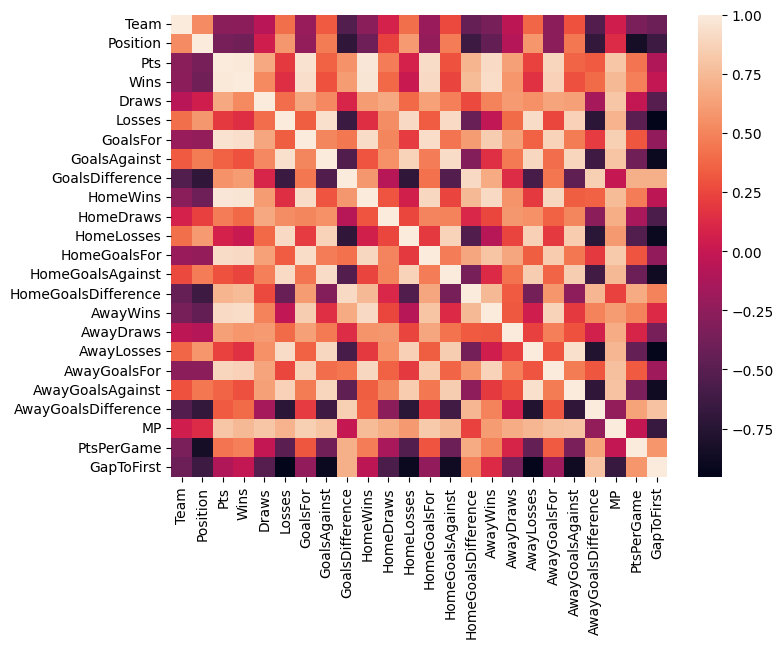

In [212]:
# Assuming 'df' is your DataFrame
corr_df = full_data.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df)
plt.show()

In [213]:
'''data_20_corr = data_20.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])
data_21_corr = data_21.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])
data_22_corr = data_22.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])
data_23_corr = data_23.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])
data_24_corr = data_24.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])
data_25_corr = data_25.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])'''

"data_20_corr = data_20.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])\ndata_21_corr = data_21.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])\ndata_22_corr = data_22.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoalsFor'])\ndata_23_corr = data_23.drop(columns=['Team', 'Draws', 'HomeDraws', 'AwayDraws', 'HomeWins', 'HomeLosses', 'AwayWins', 'AwayLosses', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeGoalsDifference', 'AwayGoalsDifference', 'HomeGoalsFor', 'AwayGoal

In [214]:
data_20_corr = data_20.drop(columns=['Team','MP'])
data_21_corr = data_21.drop(columns=['Team','MP'])
data_22_corr = data_22.drop(columns=['Team','MP'])
data_23_corr = data_23.drop(columns=['Team','MP'])
data_24_corr = data_24.drop(columns=['Team','MP'])
data_25_corr = data_25.drop(columns=['Team','MP'])
data_26_corr = data_26.drop(columns=['Team','MP'])

In [215]:
data_22_corr.columns

Index(['Position', 'Pts', 'Wins', 'Draws', 'Losses', 'GoalsFor',
       'GoalsAgainst', 'GoalsDifference', 'HomeWins', 'HomeDraws',
       'HomeLosses', 'HomeGoalsFor', 'HomeGoalsAgainst', 'HomeGoalsDifference',
       'AwayWins', 'AwayDraws', 'AwayLosses', 'AwayGoalsFor',
       'AwayGoalsAgainst', 'AwayGoalsDifference', 'PtsPerGame', 'GapToFirst'],
      dtype='object')

In [216]:
# Concatenate training data from 23 and 24 seasons
X_train = pd.concat([data_20_corr, data_21_corr, data_22_corr, data_23_corr, data_24_corr, data_25_corr], ignore_index=True)
X_train = X_train.drop(columns=['Position'])

# Prepare test data from 25 season (drop target column)
X_test = data_26_corr.drop(columns=['Position'])

# Concatenate training labels from 23 and 24 seasons
y_train = pd.concat([data_20_corr["Position"],data_21_corr["Position"],data_22_corr["Position"], data_23_corr["Position"], data_24_corr["Position"], data_25_corr["Position"]], ignore_index=True)

# Test labels from 25 season
y_test = data_26_corr["Position"]


In [218]:
model = xgb.XGBRegressor(
    max_depth=4,
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [219]:
predicted_ranks = model.predict(X_test)

In [220]:
# Invert ranks to "scores" (higher score = better chance)
inv_ranks = 1 / predicted_ranks

# Normalize to get probabilities summing to 1
win_probs = inv_ranks / np.sum(inv_ranks)

# Add to test dataframe for review
result = data_26.copy()
result['TN_Champions'] = win_probs *100
ranks = np.arange(1,len(y_test)+1)
result = result.sort_values(by='TN_Champions', ascending=False)
result['TN_Champions'] = result['TN_Champions'].round(2).astype(str) + '%'
result['Predicted_Rank'] = ranks

print(result[['Team','TN_Champions', 'Predicted_Rank']])

                          Team TN_Champions  Predicted_Rank
0                    ES Zarzis       10.06%               1
1                Club Africain       10.06%               2
5                    JS Omrane        7.44%               3
3                  ES Métlaoui         7.2%               4
4   Avenir Sportif De La Marsa        7.09%               5
2               Stade Tunisien        7.09%               6
7              US Ben Guerdane        5.55%               7
6              JS Kairouanaise        5.38%               8
8              Espérance Tunis        5.34%               9
12                  CS Sfaxien        5.28%              10
11                 CA Bizertin        5.28%              11
9                  US Monastir        5.28%              12
10     Avenir Sportif De Gabes        5.28%              13
13              Olympique Béja        5.11%              14
14                  AS Soliman        4.28%              15
15    Etoile Sportive Du Sahel        4.

In [194]:
for col in X_train.columns:
    print(f"{col}: {model.feature_importances_[X_train.columns.get_loc(col)]}")

Pts: 0.0005738358595408499
Wins: 0.00010903525981120765
Draws: 0.006565160118043423
Losses: 0.0074150715954601765
GoalsFor: 0.004566222429275513
GoalsAgainst: 0.0007468328694812953
GoalsDifference: 0.0006672635208815336
HomeWins: 0.07238875329494476
HomeDraws: 0.00017816698527894914
HomeLosses: 0.012243366800248623
HomeGoalsFor: 9.294843039242551e-05
HomeGoalsAgainst: 2.300368760188576e-05
HomeGoalsDifference: 0.008399580605328083
AwayWins: 4.27988697992987e-06
AwayDraws: 0.0010046442039310932
AwayLosses: 0.0002916529483627528
AwayGoalsFor: 0.0024807602167129517
AwayGoalsAgainst: 0.009689023718237877
AwayGoalsDifference: 0.019106853753328323
PtsPerGame: 0.10461068153381348
GapToFirst: 0.7488428354263306


In [195]:
probs = result[['Team', 'TN_Champions', 'Predicted_Rank']]
probs

,Team,TN_Champions,Predicted_Rank
0,Espérance Tunis,16.52%,1
1,US Monastir,16.07%,2
2,Etoile Sportive Du Sahel,10.96%,3
3,Club Africain,10.08%,4
5,Stade Tunisien,7.58%,5
4,ES Zarzis,7.26%,6
6,CS Sfaxien,5.57%,7
7,ES Métlaoui,5.32%,8
8,CA Bizertin,3.23%,9
9,AS Soliman,3.15%,10


In [196]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_ranks.round())
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.25
